# Hacktiv8-PTP Python For Data Science // S.8 // Advanced Visualization
## Advance Visualization 1
### Introduction
Di section ini, kita akan belajar cara membuat word cloud dan waffle charts. Selanjutnya kita akan mulai belajar tentang library visualisasi tambahan yang berbasis Matplotlib, yaitu library seaborn, dan kita akan belajar cara membuat plot regresi menggunakan library seaborn.

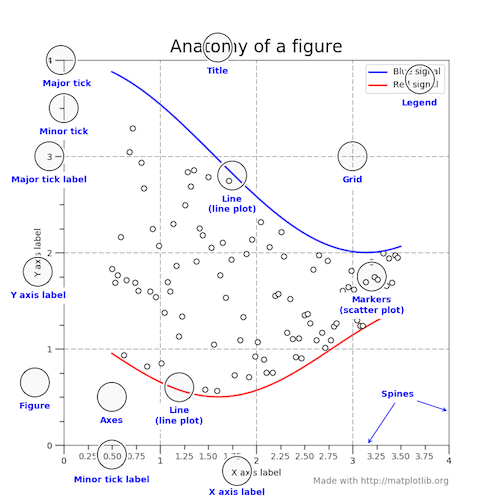

Pic source: matplotlib.org

## Exploring Datasets with pandas and Matplotlib
Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization.

Datasets:

1. Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

## Downloading and Prepping Data

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

Mari impor set data Imigrasi Kanada utama kita menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan pandas untuk membaca file excel. Modul ini bernama xlrd.

Download

In [3]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [5]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line Plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.head(3)

OdName AreaName          RegName             DevName  1980  1981  \
0  Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1      Albania   Europe  Southern Europe   Developed regions     1     0   
2      Algeria   Africa  Northern Africa  Developing regions    80    67   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  

[3 rows x 38 columns]

In [7]:
# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.head(3)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   
2      Algeria    Africa  Northern Africa  Developing regions    80    67   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  

[3 rows x 38 columns]

In [8]:
print(df_can.columns)

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')


In [9]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')


--------------------------
## Example map
map(function, iterables)

- **function :** Wajib diisi. Fungsi yang akan dijalankan untuk setiap item

- **iterable :** Wajib diisi. Urutan, koleksi, atau objek iterator. Anda dapat mengirim iterable sebanyak yang Anda suka, pastikan fungsi tersebut memiliki satu parameter untuk setiap iterable.

In [10]:
def myfunc(n):
  return len(n)

x = map(myfunc, ('apple', 'banana', 'cherry'))
print(list(x))

[5, 6, 6]


In [11]:
def myfunc(a, b):
  return a + b

x = map(myfunc, ('apple', 'banana', 'cherry'), ('orange', 'lemon', 'pineapple'))
print(list(x))

['appleorange', 'bananalemon', 'cherrypineapple']


In [12]:
raw_data = {"first_name": ["Sheldon", "Raj", "Leonard", "Howard", "Amy"],
                "last_name": ["Copper", "Koothrappali", "Hofstadter", "Wolowitz", "Fowler"],
                "age": [42, 38, 36, 41, 35],
                "Rating_Score": [25, 25, 49, 62, 70]}

df_data = pd.DataFrame(raw_data, columns = ["first_name", "last_name", "age",
                                            "Rating_Score"])
print(df_data)

  first_name     last_name  age  Rating_Score
0    Sheldon        Copper   42            25
1        Raj  Koothrappali   38            25
2    Leonard    Hofstadter   36            49
3     Howard      Wolowitz   41            62
4        Amy        Fowler   35            70


In [13]:
Subjects = {"Sheldon" : "Science",
                     "Raj" : "Chemistry",
                     "Leonard" : "Maths",
                     "Howard" : "Astronaut",
                     "Amy" : "Science"}
print(Subjects)

{'Sheldon': 'Science', 'Raj': 'Chemistry', 'Leonard': 'Maths', 'Howard': 'Astronaut', 'Amy': 'Science'}


In [14]:
df_data["Subjects"] = df_data["first_name"].map(Subjects)
print(df_data)

  first_name     last_name  age  Rating_Score   Subjects
0    Sheldon        Copper   42            25    Science
1        Raj  Koothrappali   38            25  Chemistry
2    Leonard    Hofstadter   36            49      Maths
3     Howard      Wolowitz   41            62  Astronaut
4        Amy        Fowler   35            70    Science


In [15]:
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')


In [16]:
print(df_can.index)

RangeIndex(start=0, stop=195, step=1)


In [17]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)
print(df_can.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


In [18]:
print(df_can.head(1))

            Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   

             1983  1984  1985  1986  ...  2004  2005  2006  2007  2008  2009  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  2978  3436  3009  2652  2111  1746   

             2010  2011  2012  2013  
Country                              
Afghanistan  1758  2203  2635  2004  

[1 rows x 37 columns]


In [19]:
# add total column
df_can['Total'] =  df_can.sum(axis = 1)
df_can.head(1)

C:\Users\Fransisca Mulya Sari\AppData\Local\Temp\ipykernel_13784\367663411.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum(axis = 1)


Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  58639  

[1 rows x 38 columns]

In [20]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print(years) 
# print ('data dimensions:', df_can.shape)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## Visualizing Data using Matplotlib

In [21]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.2


## Waffle Charts (Optional)
Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.

Bagan wafel menunjukkan kemajuan menuju target atau persentase penyelesaian. Ada kotak sel kecil, di mana sel berwarna mewakili data.

Bagan dapat terdiri dari satu kategori atau beberapa kategori. Beberapa grafik wafel dapat disatukan untuk menunjukkan perbandingan antara grafik yang berbeda.

Kasus penggunaan yang bagus
- Membandingkan item tingkat tinggi atau melihat bagaimana mereka berkontribusi secara keseluruhan
- Menempatkan peningkatan penekanan pada bagian dari keseluruhan
- Menggunakan grafik KPI (Key Performance Indicator) sebagai % dari total

Kasus penggunaan yang tidak cocok
- Ketika banyak nilai berkontribusi pada keseluruhan
- Ketika KPI yang diukur bisa melebihi 100%
- Ketika persentase yang tepat sangat penting, karena menunjukkan pecahan persen lebih sulit untuk dilihat di luar perkiraan kasar
source : https://www.tableau.com/about/blog/2017/4/viz-variety-show-precise-waffle-charts-68462

**The Waffle**

Ada dua perbedaan utama antara wafel dan diagram lingkaran persegi.
- Pertama, bagan wafel tidak terbatas untuk menunjukkan bagian dari keseluruhan. Di mana semua jenis PEI terbatas pada perbandingan relatif , wafel memungkinkan perbandingan mutlak .
- Perbedaan kedua – berakar pada yang pertama – adalah bahwa bagan wafel tidak harus sesuai dengan kisi 10 × 10, dan pada kenyataannya, biasanya tidak. Oleh karena itu, satu bujur sangkar dapat disetel agar sama dengan nilai apa pun, yang semakin meningkatkan keserbagunaannya. Karena bagan wafel dan pei persegi dibuat dari potongan grafis yang sama, ada asumsi aman bahwa mereka kira-kira dapat dibaca satu sama lain.

sumber : aptitive

untuk lebih mengetahui tentang waffle chart bisa di lihat : https://aptitive.com/blog/your-dashboard-needs-a-waffle-chart/

Mari kita lihat kembali studi kasus sebelumnya tentang Denmark, Norwegia, dan Swedia.

In [22]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

**Step 1. Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya.**

In [23]:
total_values = sum(df_dsn['Total'])
total_values

12094

In [24]:
# compute the proportion of each category with respect to the total
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
print(category_proportions)
print(type(category_proportions))

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
<class 'list'>


In [25]:
# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


-------------
enumerate(iterable, start)
- iterable : An iterable object
- start : A Number. Defining the start number of the enumerate object. Default 0

In [26]:
x = ('apple', 'banana', 'cherry')
y = enumerate(x)
print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


In [27]:
lstA = [0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
for idx, value in enumerate(lstA):
    print ('index :'+ str(idx) + ', ' + str(value))

index :0, 0.32255663965602777
index :1, 0.1924094592359848
index :2, 0.48503390110798744


**Step 2. Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart.**

In [28]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3. Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori**

In [29]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
tiles_per_category

[129, 77, 194]

In [30]:
# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

**Step 4. Langkah keempat adalah membuat matriks yang menyerupai wafel dan mengisinya.**

In [31]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [32]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori.

**Step 5. Petakan matriks waffle chart menjadi visual.**

<Figure size 640x480 with 0 Axes>

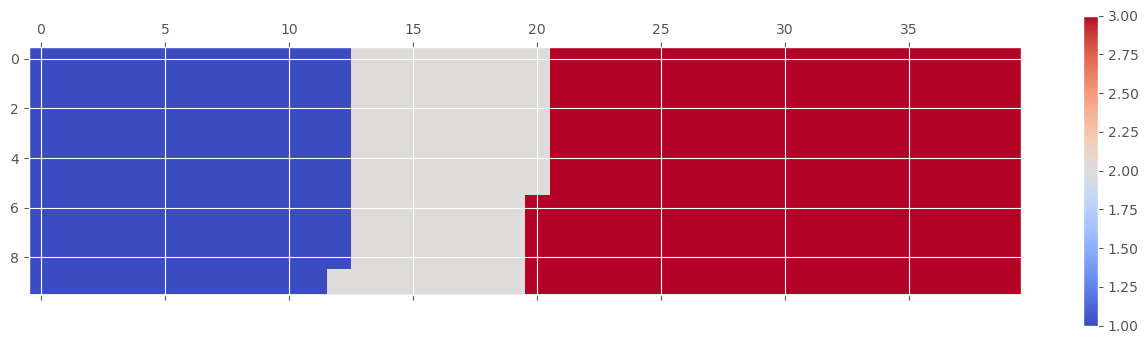

In [34]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6. Percantik chart**

([], [])

<Figure size 640x480 with 0 Axes>

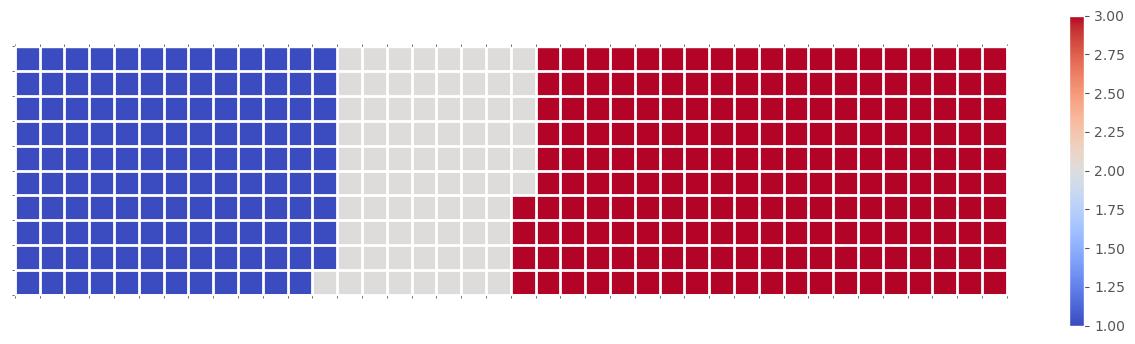

In [35]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7. Tambahkan legend**

<Figure size 640x480 with 0 Axes>

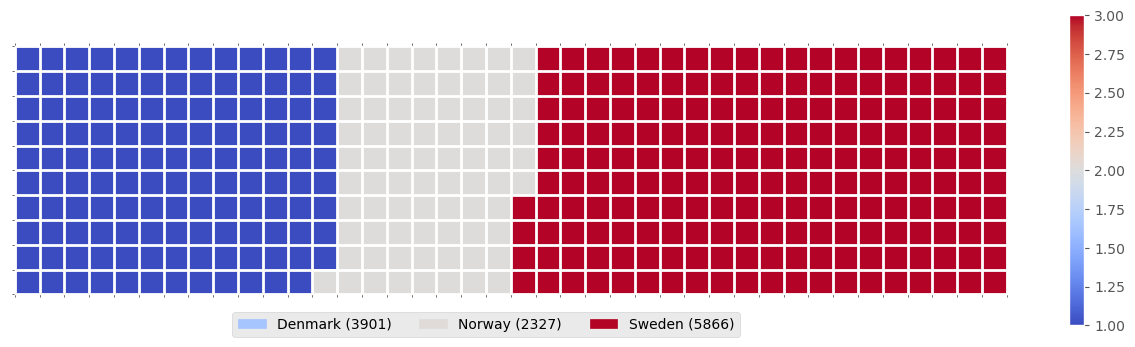

In [36]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:

1. **categories:** Unique categories or classes in dataframe.
2. **values:** Values corresponding to categories or classes.
3. **height:** Defined height of waffle chart.
4. **width:** Defined width of waffle chart.
5. **colormap:** Colormap class
6. **value_sign:** In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [37]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Sekarang untuk membuat waffle, yang harus kita lakukan adalah memanggil fungsi create_waffle_chart. Mari tentukan parameter input:

In [38]:
width = 50 # width of chart
height = 20 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Dan sekarang mari kita panggil fungsi kita untuk membuat waffle.

Total number of tiles is 1000
Denmark: 323
Norway: 192
Sweden: 485


<Figure size 640x480 with 0 Axes>

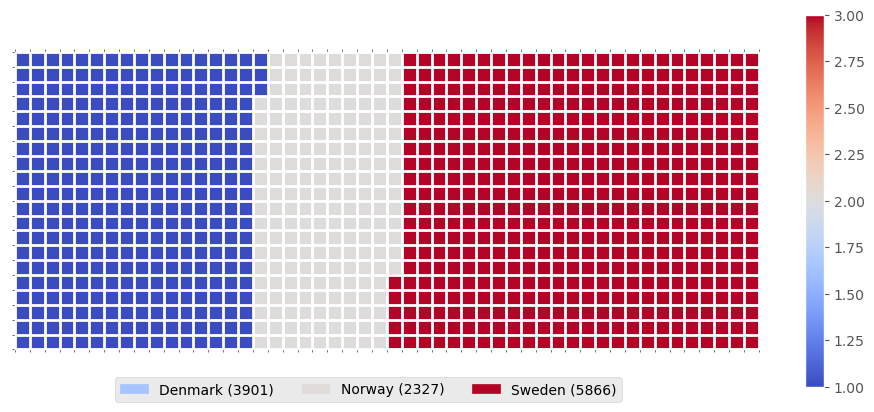

In [39]:
create_waffle_chart(categories, values, height, width, colormap)

<Figure size 640x480 with 0 Axes>

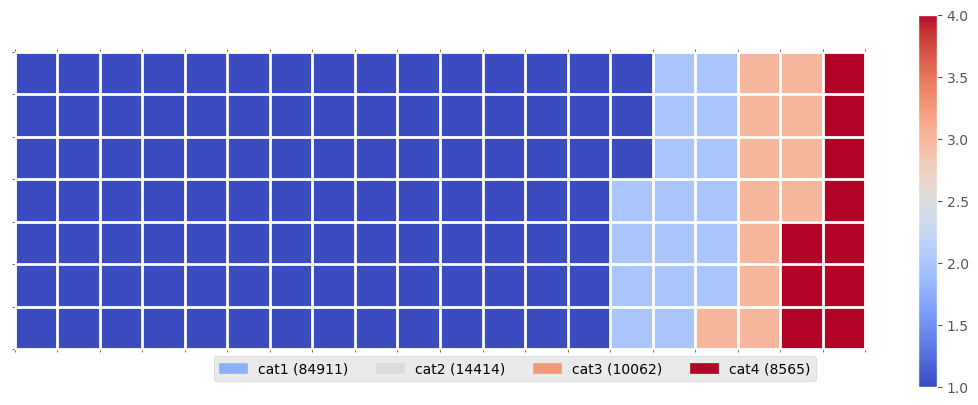

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'catagories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })
# Now, we define a desired height and width.
waffle_plot_width = 20
waffle_plot_height = 7

classes = df['catagories']
values = df['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm)

https://github.com/gyli/PyWaffle

In [41]:
pip install pywaffle


     ---------------------------------------- 25.2/25.2 MB 1.1 MB/s eta 0:00:00


In [42]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

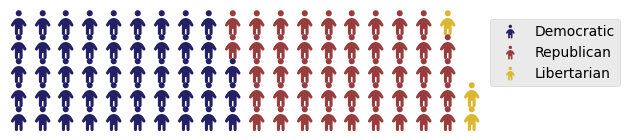

In [43]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#232066", "#983D3D", "#DCB732"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18, 
    icon_legend=True
)

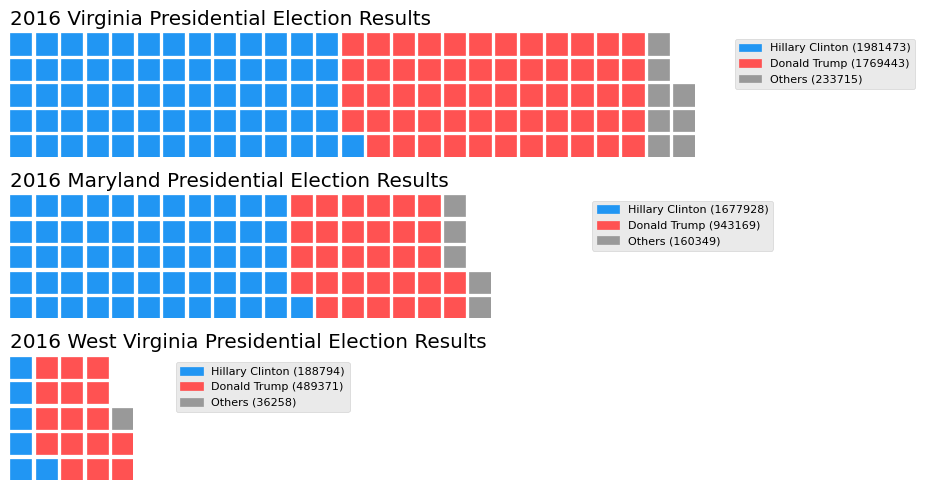

In [44]:
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Hillary Clinton', 'Donald Trump', 'Others'],
        'Virginia': [1981473, 1769443, 233715],
        'Maryland': [1677928, 943169, 160349],
        'West Virginia': [188794, 489371, 36258],
    },
).set_index('labels')

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2016 Virginia Presidential Election Results', 'loc': 'left'}
        },
        312: {
            'values': data['Maryland'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Maryland'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': '2016 Maryland Presidential Election Results', 'loc': 'left'}
        },
        313: {
            'values': data['West Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['West Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': '2016 West Virginia Presidential Election Results', 'loc': 'left'}
        },
    },
    rows=5,
    colors=("#2196f3", "#ff5252", "#999999"),  # Default argument values for subplots
    figsize=(9, 5)  # figsize is a parameter of plt.figure
)

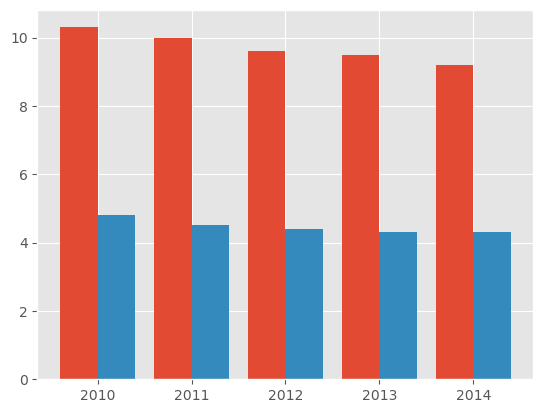

In [45]:
#or bar chart, you need to specify the x-location of all the bars. The simplest way if you have no explicit x-values is to use a range 0, 1, 2, 3, ... and so on. So if you have N bars to plot, you can generate N x-values using range() or use labels as the x-argument
labels =  np.arange(2010,2015)

scores = [np.array(['10.3', '10', '9.6', '9.5', '9.2'], dtype='<U10'), 
          np.array(['4.8', '4.5', '4.4', '4.3', '4.3'], dtype='<U10')]

bp_dict = plt.bar(labels, list(map(float, scores[0])), align='edge', width=-0.4)
bp_dict = plt.bar(labels, list(map(float, scores[1])), align='edge', width=0.4)

## Word Clouds
Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

Untungnya, sebuah package sudah ada di Python untuk menghasilkan word clouds. Package bernama word_cloud dikembangkan oleh Andreas Mueller. Kalian dapat mempelajari lebih lanjut tentang paket dengan mengikuti link ini. https://github.com/amueller/word_cloud/

Mari gunakan package ini untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

Pertama, mari instal package-nya.

In [46]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00


In [47]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


**Wordcloud is installed and imported!**

Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan Lewis Carroll berjudul Alice's Adventures in Wonderland. Ayo lanjutkan dan unduh file.txt dari novel.

In [49]:
wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alicenovel.txt

SyntaxError: invalid syntax (63931856.py, line 1)

In [51]:
# download file and save as alice_novel.txt
#wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('data/alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [52]:
alice_novel

'Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is

Selanjutnya, mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.

In [53]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Buatword cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

In [54]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

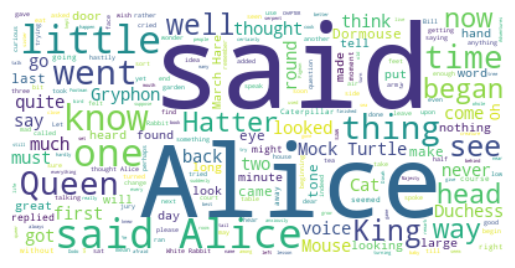

In [55]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.

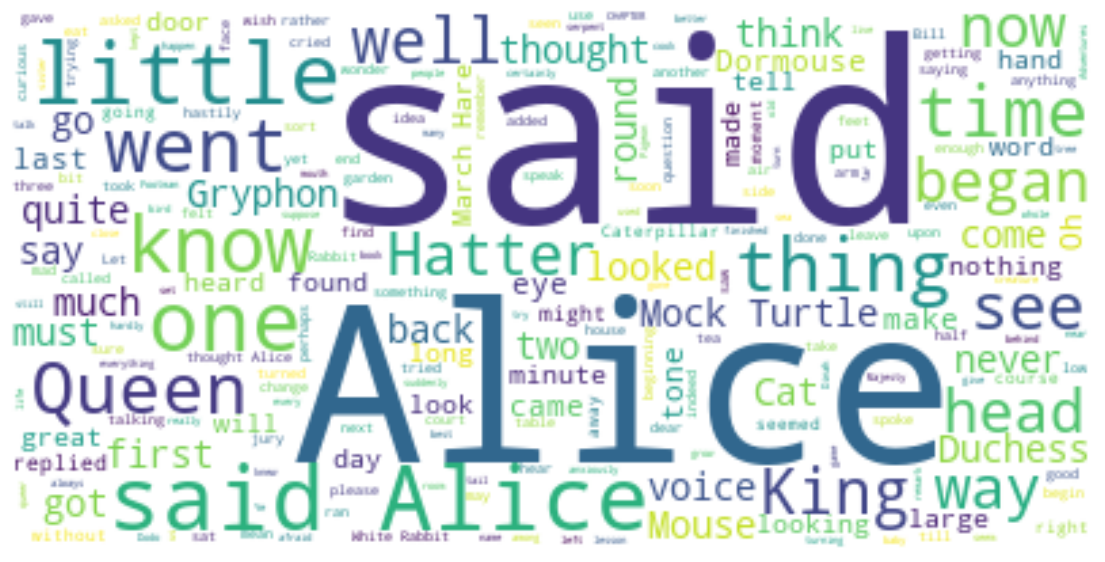

In [56]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik! Namun, said bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.

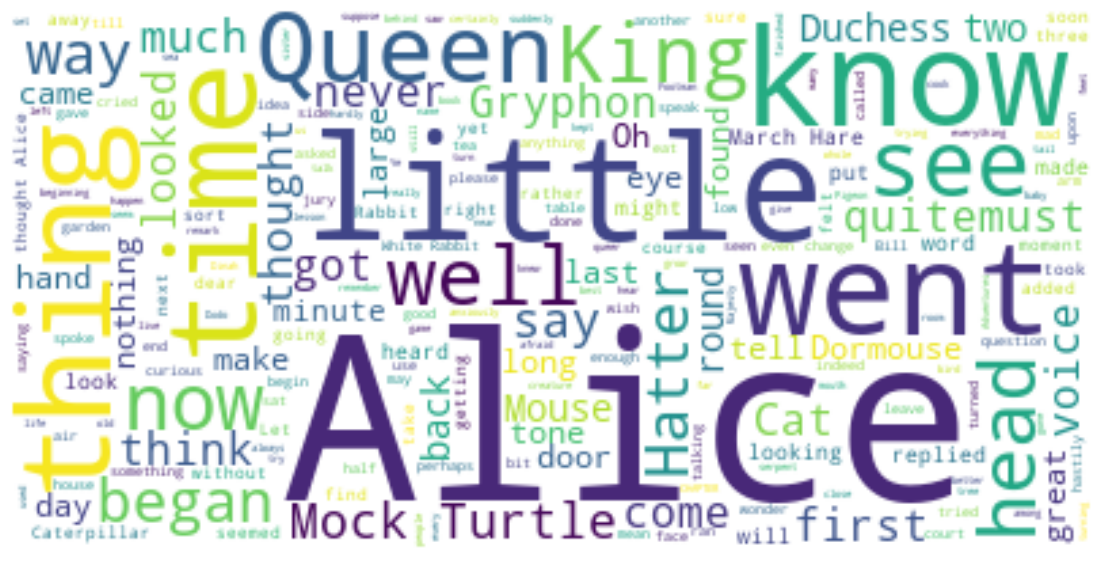

In [57]:
# stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

#stopwords.add('said') # add the words said to stopwords
stopwords.update(["said", "one", "go"])

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Luar biasa! Terlihat sangat menarik! Hal keren lainnya yang dapat kalian terapkan dengan package word_cloud adalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan unduh dan beri nama alice_mask.png.

In [58]:
from PIL import Image # converting images into arrays

# download image
#!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('data/alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Mari kita lihat bagaimana maskingnya terlihat.

In [59]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [60]:
alice_mask.shape

(900, 900)

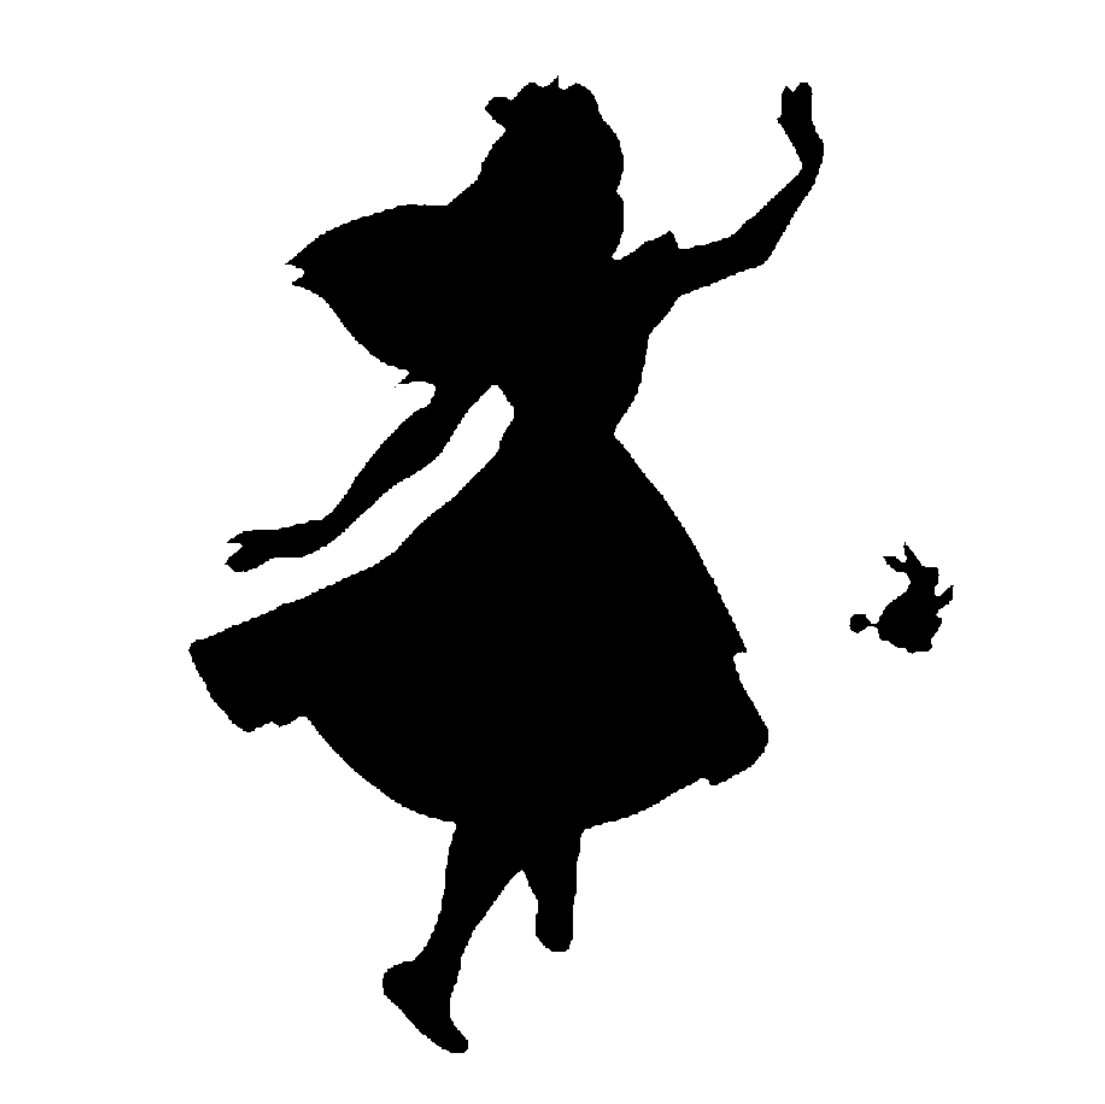

In [61]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud . Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

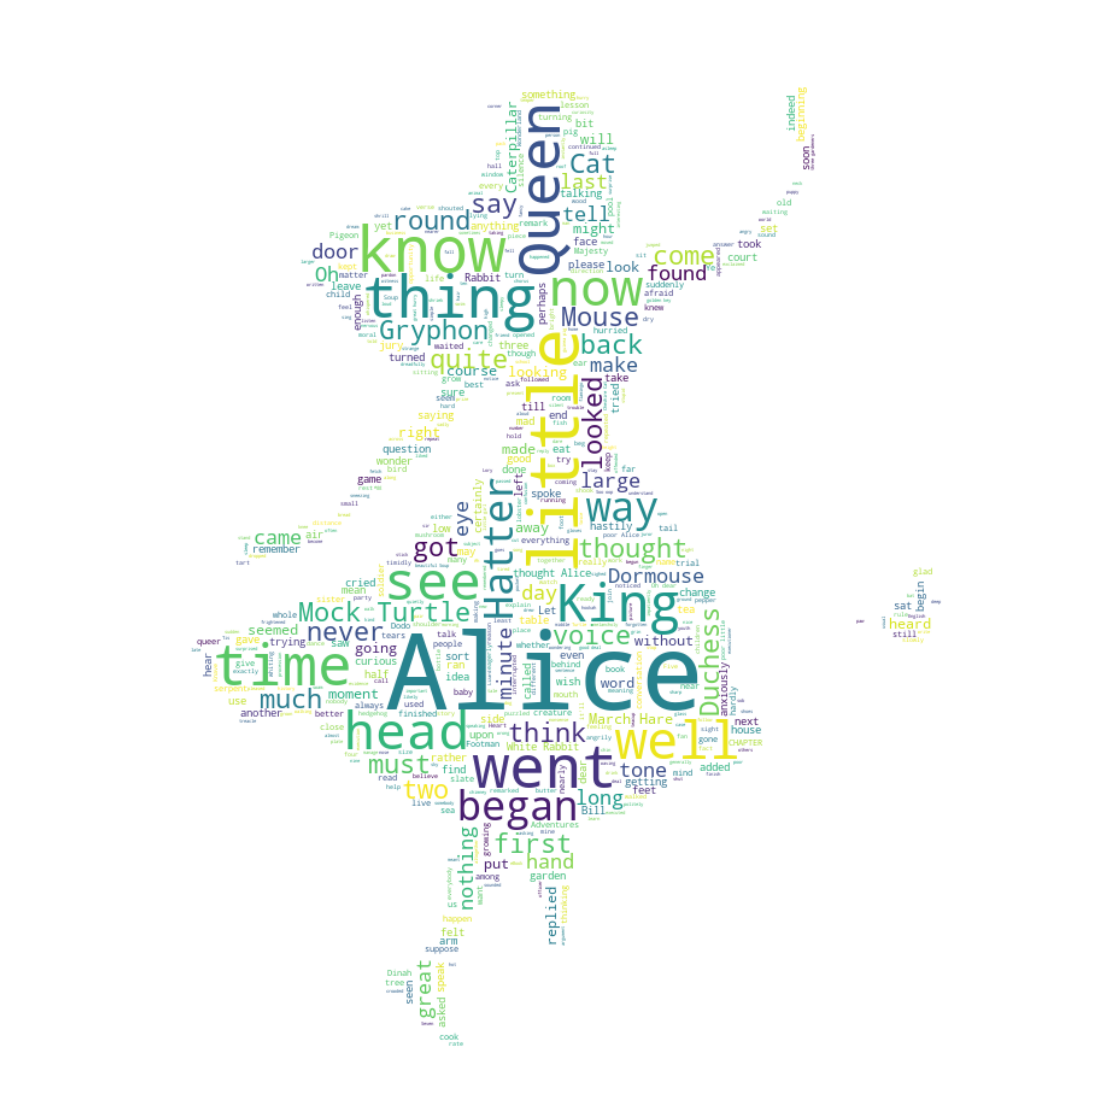

In [62]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi dimana ada kemauan pasti ada jalan. Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.

Mari kita ingat seperti apa data kita.

In [63]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

Dan berapa total imigrasi dari 1980 hingga 2013?

In [64]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [65]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

In [66]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


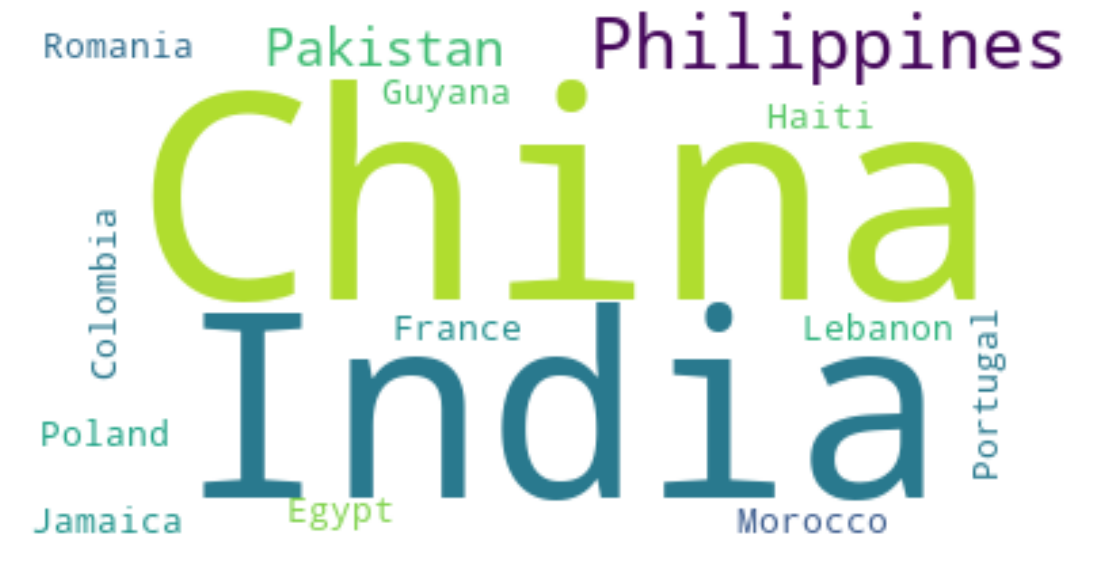

In [67]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

--------------------------

## Regression Plots
Seaborn adalah perpustakaan visualisasi Python berdasarkan matplotlib. Ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik. Anda dapat mempelajari lebih lanjut tentang seaborn dengan mengikuti tautan ini dan lebih lanjut tentang plot regresi seaborn dengan mengikuti tautan ini.

http://seaborn.pydata.org/generated/seaborn.regplot.html

Di section ini, kita akan menjelajahi seaborn dan melihat seberapa efisiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

Mari kita install seaborn

In [68]:
pip install seaborn

In [69]:
# install seaborn
#!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

In [70]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [71]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot

0
1980   99137
1981  110563
1982  104271
1983   75550
1984   73417
1985   69978
1986   86048
1987  134771
1988  139306
1989  164432
1990  188054
1991  207509
1992  221687
1993  222049
1994  193665
1995  187712
1996  200085
1997  192885
1998  160727
1999  179818
2000  216712
2001  242643
2002  223111
2003  217297
2004  232083
2005  257457
2006  247057
2007  232405
2008  243047
2009  248768
2010  276956
2011  246194
2012  256222
2013  257537

In [73]:
# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)
df_tot.index 

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0],
             dtype='float64')

In [74]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)
df_tot.index 

RangeIndex(start=0, stop=34, step=1)

In [75]:
# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot .

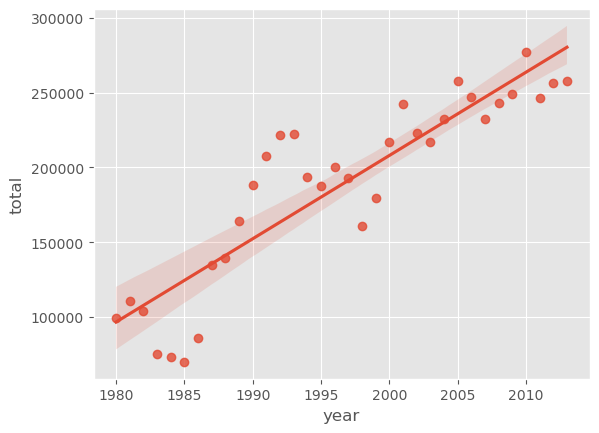

In [76]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Mari kita ubah warnanya menjadi hijau.

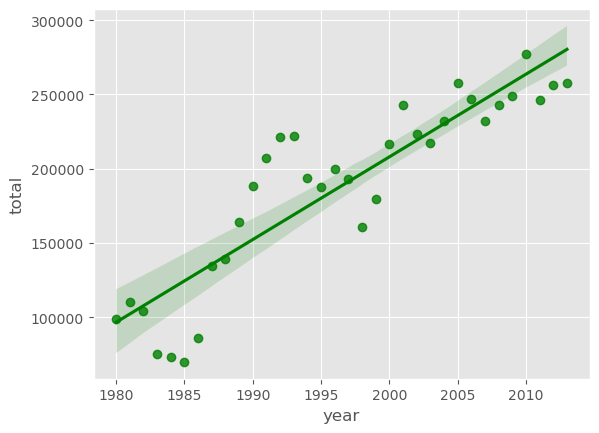

In [77]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'.

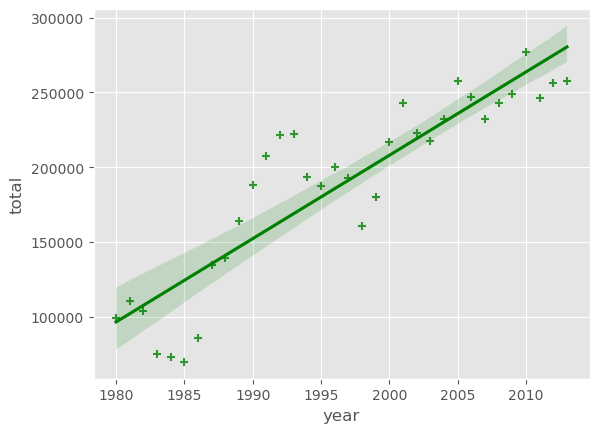

In [78]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Mari kita perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.

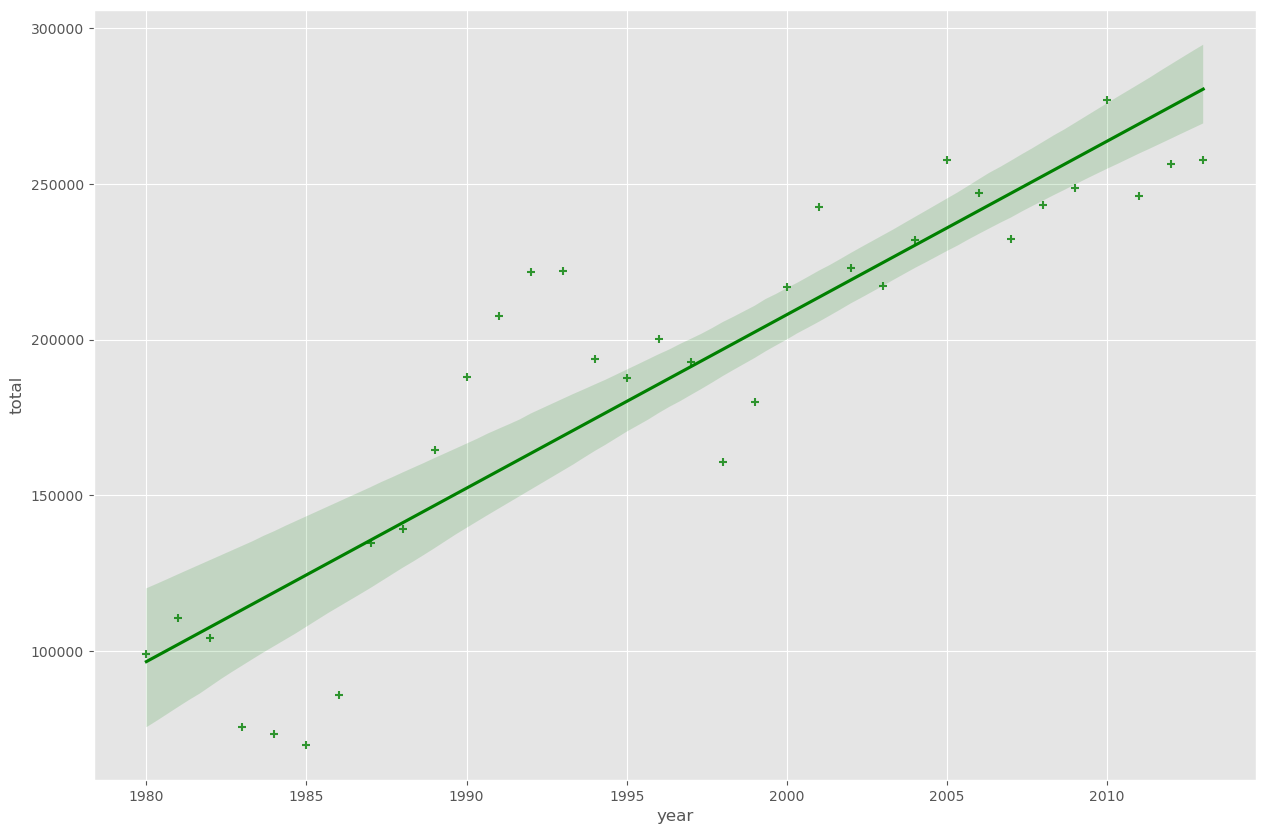

In [79]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

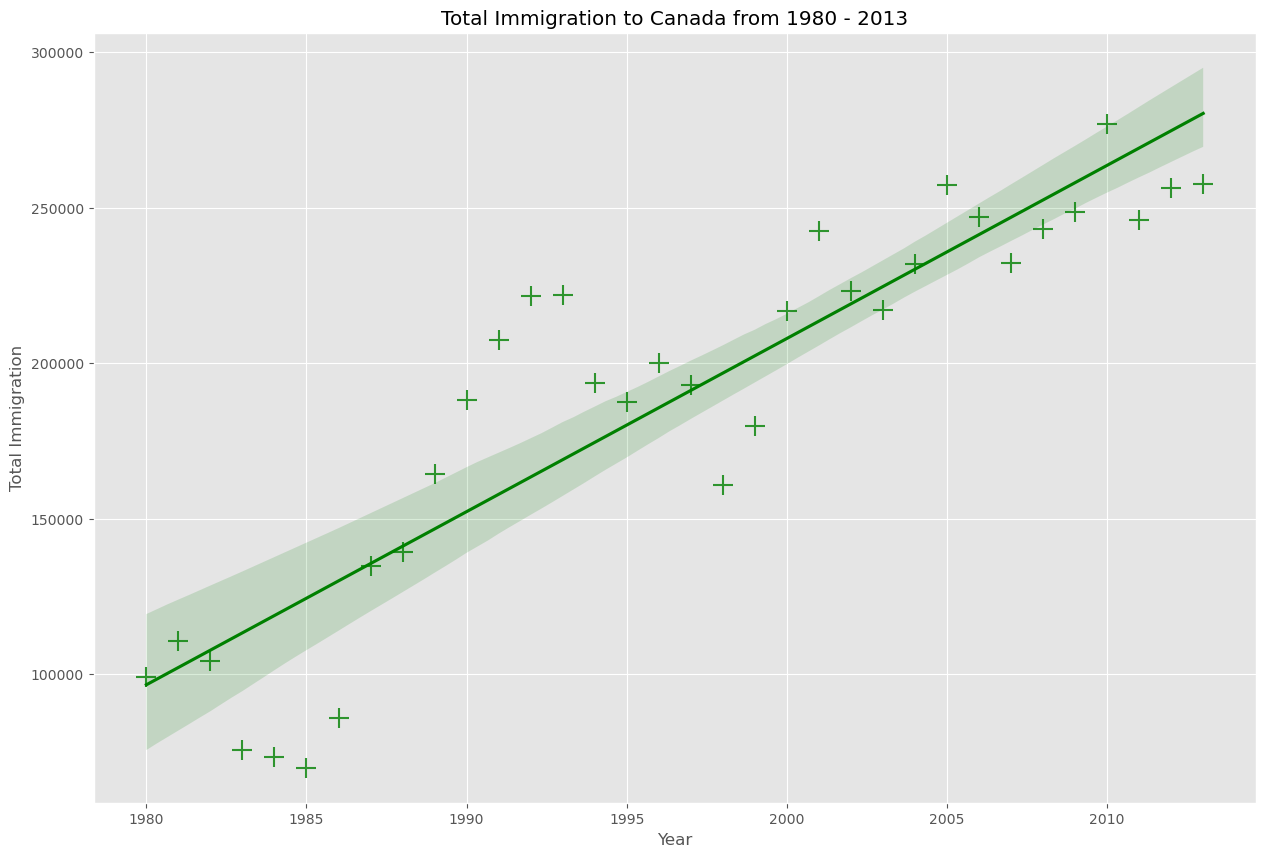

In [80]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

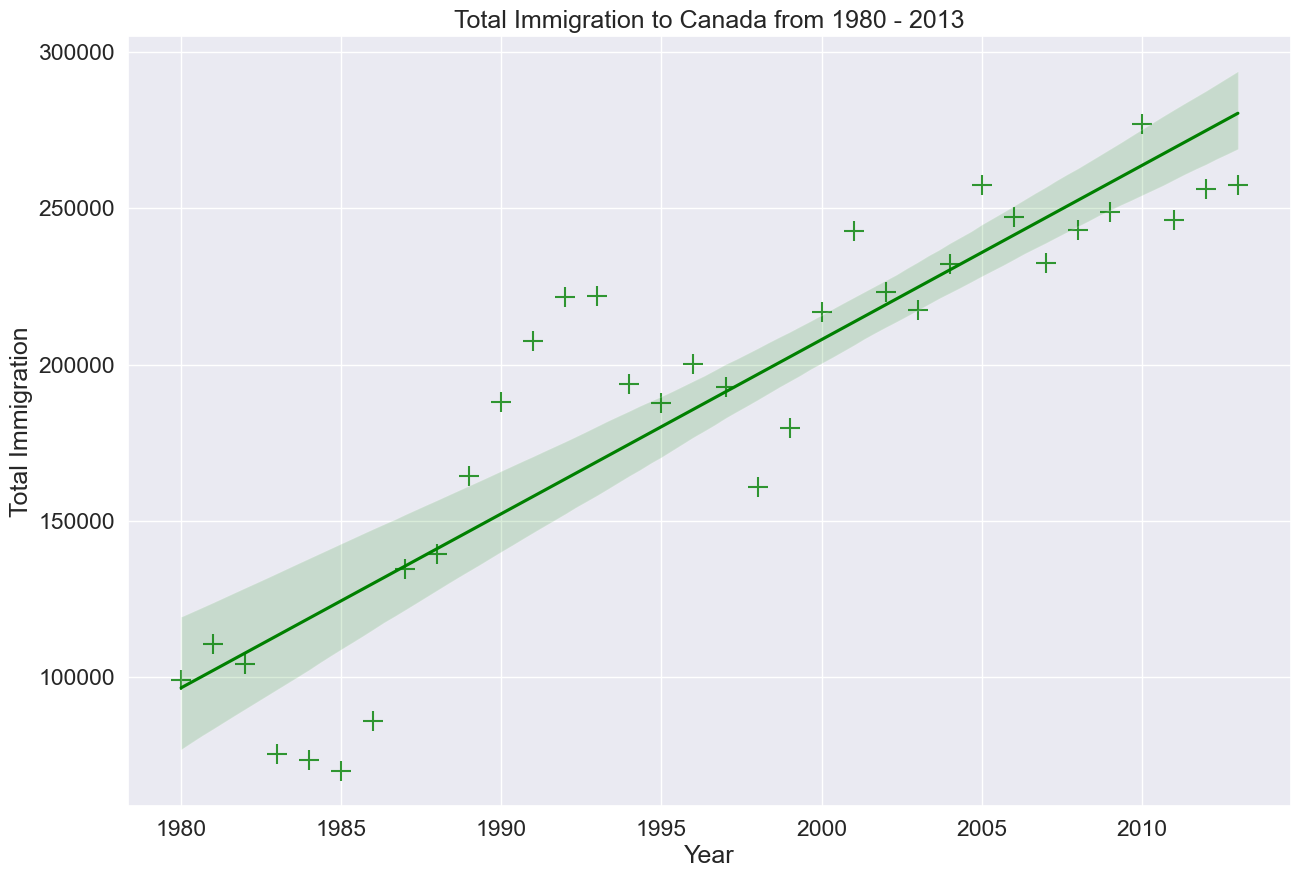

In [81]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Luar biasa! Scatter Plot lengkap dengan regression fit dengan hanya 5 baris kode.

Jika kalian bukan penggemar background ungu, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

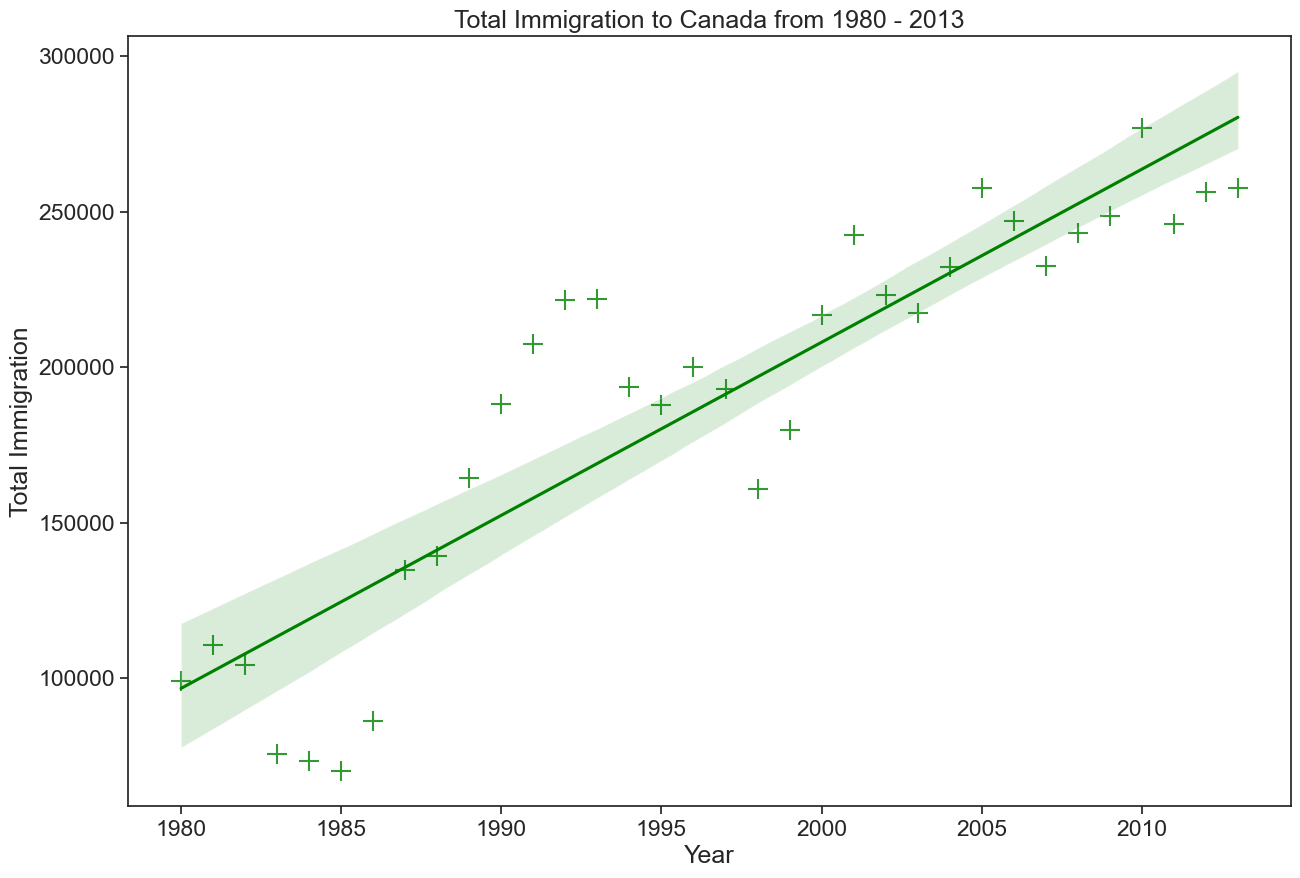

In [82]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Atau ke latar belakang putih dengan garis kisi/grid lines.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

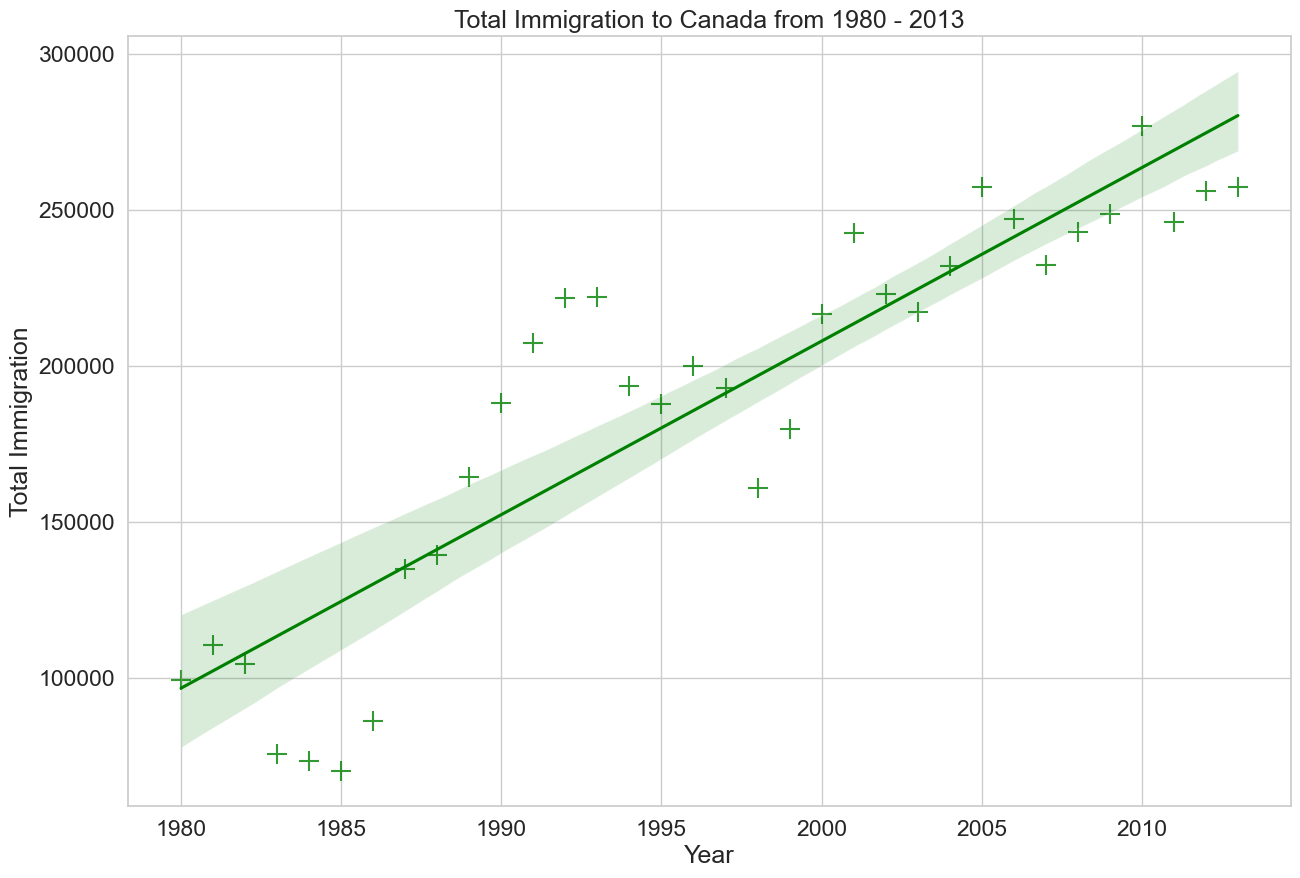

In [83]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [84]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

In [85]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128
1985          73      54     158
1986          93      56     187
1987         109      80     198
1988         129      73     171
1989         129      76     182
1990         118      83     130
1991         111     103     167
1992         158      74     179
1993         186      92     203
1994          93      60     192
1995         111      65     176
1996          70      70     161
1997          83     104     151
1998          63      31     123
1999          81      36     170
2000          93      56     138
2001          81      78     184
2002          70      74     149
2003          89      77     161
2004          89      73     129
2005          62      57     205
2006         101      53     139
2007          97      73     193
2008         108      66     165
2009          81      75     167
2010          92      46     159
2011          93      49     134
2012          94      53     140
2013          81      59     140

In [86]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total

0
1980  669
1981  678
1982  627
1983  333
1984  252
1985  285
1986  336
1987  387
1988  373
1989  387
1990  331
1991  381
1992  411
1993  481
1994  345
1995  352
1996  301
1997  338
1998  217
1999  287
2000  287
2001  343
2002  293
2003  327
2004  291
2005  324
2006  293
2007  363
2008  339
2009  323
2010  297
2011  276
2012  287
2013  280

In [87]:
# reset index in place
df_total.reset_index(inplace=True)
df_total.index

RangeIndex(start=0, stop=34, step=1)

In [88]:
# rename columns
df_total.columns = ['year', 'total']
df_total

year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280

In [89]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
df_total

year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

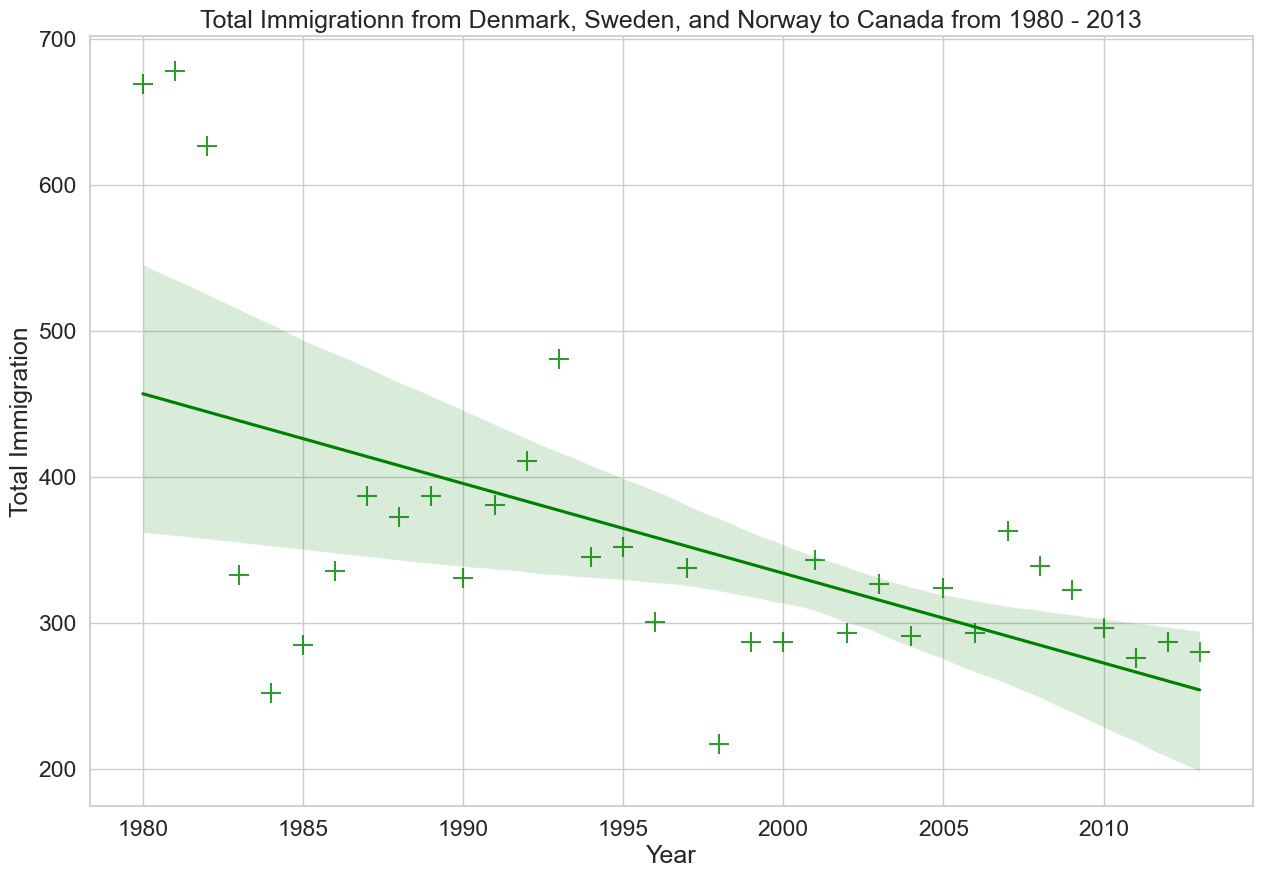

In [90]:
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

---------------------------------------------------
# Advance Visualization 2
## Introduction
--------------------------------------------------
Di section ini, kita akan mempelajari cara membuat peta untuk berbagai tujuan. Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.


## Exploring Datasets with pandas and Matplotlib
------------------------------------------------------
Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. Perpustakaan plotting utama yang akan kita jelajahi di section ini adalah Folium.

Datasets:

1. Insiden Departemen Kepolisian San Francisco untuk tahun 2016 - Insiden Departemen Kepolisian dari portal data publik San Francisco. Insiden berasal dari sistem Pelaporan Insiden Kejahatan Departemen Kepolisian San Francisco (SFPD). Diperbarui setiap hari, menampilkan data sepanjang tahun 2016. Alamat dan lokasi telah dianonimkan dengan pindah ke blok tengah atau ke persimpangan.
2. Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

## Downloading and Prepping Data
--------------------------------------------
Import Primary Modules:

In [13]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

## Introduction to Folium
------------------------------------
Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat perpustakaan ini sangat berguna untuk pembuatan dasbor.

Dari halaman dokumentasi resmi Folium:

Folium dibangun di atas kekuatan perselisihan data ekosistem Python dan kekuatan pemetaan pustaka Leaflet.js. Manipulasi data Anda dengan Python, lalu visualisasikan di peta Leaflet melalui Folium.

Folium memudahkan untuk memvisualisasikan data yang telah dimanipulasi dengan Python pada peta Leaflet interaktif. Ini memungkinkan pengikatan data ke peta untuk visualisasi choropleth serta melewatkan visualisasi Vincent/Vega sebagai penanda di peta.

Pustaka memiliki sejumlah ubin bawaan dari OpenStreetMap, Mapbox, dan Stamen, dan mendukung ubin khusus dengan kunci API Mapbox atau Cloudmade. Folium mendukung overlay GeoJSON dan TopoJSON, serta pengikatan data ke overlay tersebut untuk membuat peta choropleth dengan skema warna color-brewer.

### Let's install Folium

Folium tidak tersedia secara default. Jadi, kita harus menginstalnya terlebih dahulu sebelum dapat mengimpornya.

In [14]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [15]:
#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [16]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Coba perbesar dan perkecil peta yang dirender di atas.

Kalian dapat menyesuaikan definisi default peta dunia ini dengan menentukan pusat peta kalian dan tingkat zoom awal.

Semua lokasi di peta ditentukan oleh nilai Lintang dan Bujurnya masing-masing. Jadi kalian dapat membuat peta dan melewati di tengah nilai Lintang dan Bujur [0, 0].

Untuk pusat yang ditentukan, kalian juga dapat menentukan tingkat zoom awal ke lokasi itu saat peta dirender. Semakin tinggi tingkat zoom peta semakin diperbesar ke tengah.

Mari buat peta yang berpusat di sekitar Semarang dan mainkan dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap peta yang dibuat.

In [17]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

Mari buat peta lagi dengan tingkat zoom yang lebih tinggi

In [18]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

Seperti yang kalian lihat, semakin tinggi tingkat zoom peta semakin diperbesar ke pusat yang diberikan.

Question: Create a map of Hacktiv8 with a zoom level of 15.

In [19]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

Fitur keren lainnya dari Folium adalah kalian dapat menghasilkan gaya peta yang berbeda.

## A. Stamen Toner Maps
Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

Mari buat peta Stamen Toner Semarang dengan tingkat zoom 13.

In [20]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

Jangan ragu untuk memperbesar dan memperkecil peta untuk melihat bagaimana gaya ini dibandingkan dengan gaya default.

## B. Stamen Terrain Maps
Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

Mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13.

In [21]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

Jangan ragu untuk memperbesar dan memperkecil peta untuk melihat bagaimana gaya ini dibandingkan dengan gaya default.

## Maps with Markers
Mari unduh dan mengimpor data police department incidents menggunakan method pandas read_csv().

In [22]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Mari kita lihat lima item pertama dalam dataset kita.

In [23]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

Jadi setiap baris terdiri dari 13 fitur:

- IncidentNum: Nomor Insiden
- Kategori: Kategori kejahatan atau insiden
- Deskripsi: Deskripsi kejahatan atau insiden
- DayOfWeek: Hari di mana insiden itu terjadi
- Tanggal: Tanggal terjadinya insiden
- Waktu: Waktu hari di mana insiden itu terjadi
- PdDistrict: Distrik departemen kepolisian
- Resolusi: Penyelesaian kejahatan dalam hal apakah pelaku ditangkap atau tidak
- Alamat: Alamat terdekat dengan tempat kejadian
- X: Nilai bujur dari lokasi kejahatan
- Y: Nilai garis lintang lokasi kejahatan
- Lokasi: Tuple nilai lintang dan bujur
- PdId: ID departemen kepolisian

Mari kita cari tahu berapa banyak entri di kumpulan data kita.

In [24]:
df_incidents.shape

(150500, 13)

Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini.

In [25]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Mari kita konfirmasikan bahwa dataframe kita sekarang hanya terdiri dari 100 kejahatan.

In [26]:
df_incidents.shape

(100, 13)

Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.

In [27]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [28]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map.

In [29]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group 
# y latitude , x long 
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Kalian juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat kalian mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

In [30]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker. Jika kalian menyadari peta menjadi sangat padat akan semua marker ini, ada dua solusi untuk masalah ini. Solusi yang lebih sederhana adalah dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran itu sendiri sebagai berikut:

In [31]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

Solusi lain yang tepat adalah dengan mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.

In [32]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau kejahatan, yang merupakan jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

## Choropleth Maps
-------------------------------
Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta Choropleth AS yang menggambarkan populasi dengan mil persegi per negara bagian.

Sekarang, mari buat peta Choropleth dunia kita sendiri yang menggambarkan imigrasi dari berbagai negara ke Canada.

Pertama-tama, unduh dan impor kumpulan data imigrasi Kanada utama kita sebelumnya menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan panda untuk dibaca di file excel. Modul ini xlrd.

In [33]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



Download dataset dan tampilkan kedalam pandas dataframe:

In [34]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [35]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

Mari kita cari tahu berapa banyak entri di kumpulan data kita.

In [36]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line Plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

In [37]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\Fransisca Mulya Sari\AppData\Local\Temp\ipykernel_9108\2139836958.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


Mari kita lihat lima item pertama dari kerangka data yang telah dibersihkan.

In [38]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. Unduh file GeoJSON terlebih dahulu.

In [90]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


Sekarang setelah kita memiliki file GeoJSON, mari buat peta dunia, berpusat di sekitar [0, 0] nilai lintang dan bujur, dengan tingkat zoom awal 2, dan menggunakan gaya Mapbox Bright.

In [99]:
world_geo = r'data/world_countries.json' # geojson file

In [100]:
world_geo

'data/world_countries.json'

In [102]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreet Map')

In [103]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

FileNotFoundError: [Errno 2] No such file or directory: 'world_countries.json'

## Folium Project : Visualizing Bus Traffic in New York City
Data Set :

### Latihan Ke-1 Visualisasi Dataset Titanic
**Langkah 1. Impor perpustakaan yang diperlukan**
Kode dibawah ini :

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

**Langkah 2. Impor dataset dari alamat ini**

In [44]:
url = 'https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/titanic.csv'

**Langkah 3. buat varibael df_titanic**

In [46]:
df_titanic = pd.read_csv(url)

df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Langkah 4. Tetapkan PassengerId sebagai indeks**

In [47]:
df_titanic.set_index('PassengerId').head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

**Langkah 5. Buat diagram lingkaran yang menyajikan proporsi pria/wanita**

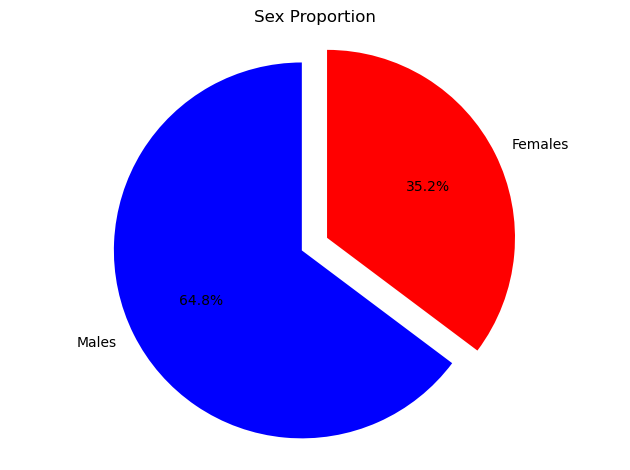

In [48]:
# sum the instances of males and females
males = (df_titanic['Sex'] == 'male').sum()
females = (df_titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

**Langkah 6. Buat plot sebar dengan Tarif yang dibayarkan dan Usia, bedakan warna plot berdasarkan jenis kelamin**

(-5.0, 85.0)

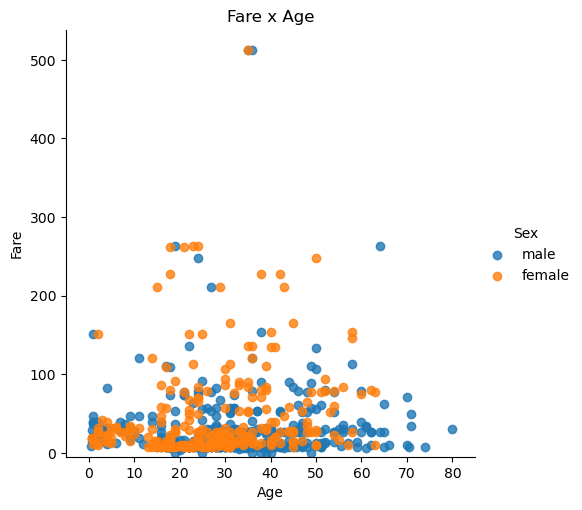

In [49]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = df_titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

**Langkah 7. Berapa banyak orang yang selamat?**

In [50]:
df_titanic.Survived.sum()

342

**Langkah 8. Buat histogram dengan Tarif yang dibayarkan**

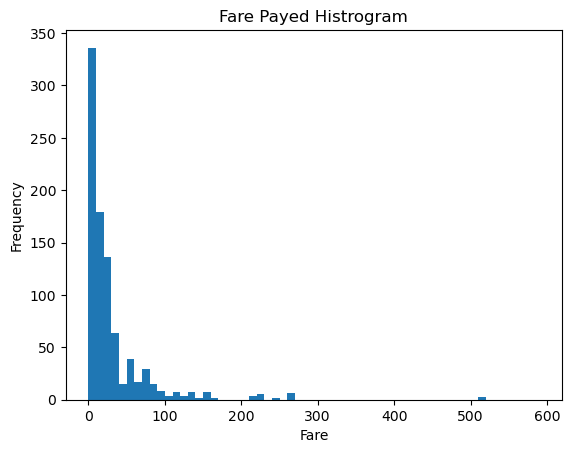

In [51]:
# sort the values from the top to the least value and slice the first 5 items
df = df_titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

## Latihan Ke-2 Visual Datase Online Retail
Data set from. archive.ics.uci.edu

https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

In [52]:
!pip install seaborn

**Langkah 1. Import the necessary libraries**

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

#set seaborn graphs to a better style
sns.set(style="ticks")

**Langkah 2. Import the dataset from this address.**

In [54]:
df_retail = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

**Langkah 3. Buat variabel df_retail & tampilkan 5 teratas**

In [55]:
df_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [56]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Langkah 4. Buat histogram dengan 10 negara yang paling banyak dipesan 'Quantity' kecuali Inggris**

Kode dibawah ini :

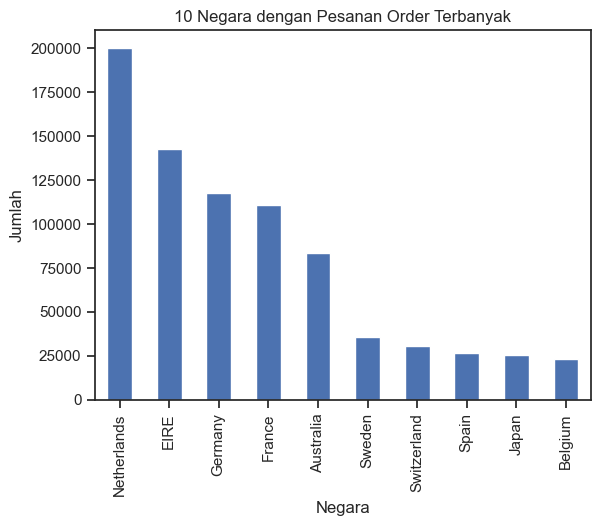

In [57]:
# group by the Country
countries = df_retail.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Negara')
plt.ylabel('Jumlah')
plt.title('10 Negara dengan Pesanan Order Terbanyak')

# show the plot
plt.show()

**Langkah 5. Kecualikan data quantity negatif**

In [58]:
df_retail = df_retail[df_retail.Quantity > 0]
df_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

**Langkah 6. Buat scatterplot dengan Quantity per UnitPrice by CustomerID untuk 3 Negara teratas (kecuali Inggris)**

Kode dibawah ini :

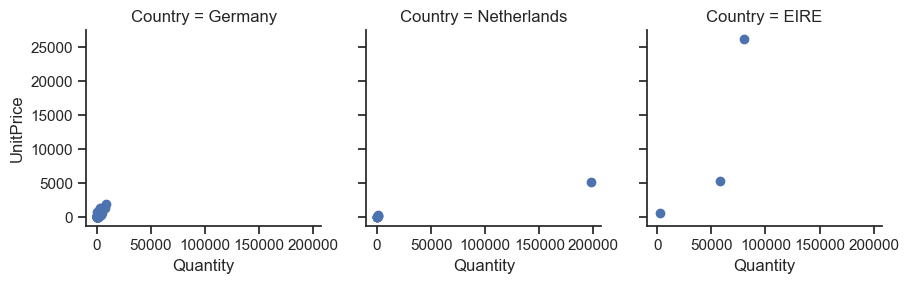

In [59]:
# groupby CustomerID
customers = df_retail.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

**Langkah 7. Selidiki mengapa hasil sebelumnya terlihat sangat tidak informatif.**
Bagian ini mungkin tampak agak membosankan untuk dilalui. Tapi saya menganggapnya sebagai semacam simulasi masalah yang mungkin dihadapi seseorang ketika berhadapan dengan data dan orang lain. Selain itu ada hadiah di akhir (yaitu Bagian 8).

(Tetapi jangan ragu untuk langsung masuk ke Bagian 8 jika Anda mau; Anda tidak perlu menyelesaikan bagian ini.)

**Langkah 7.1 Lihatlah baris kode pertama pada Langkah 6. Dan coba cari tahu apakah itu mengarah pada masalah apa pun.**

**Langkah 7.1.1 Tampilkan beberapa baris pertama dari DataFrame itu.**

code in here

In [60]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.
customers = df_retail.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers


Quantity  UnitPrice
CustomerID Country                            
12346.0    United Kingdom     74215       1.04
12347.0    Iceland             2458     481.21
12348.0    Finland             2341     178.71
12349.0    Italy                631     605.10
12350.0    Norway               197      65.30

**Langkah 7.1.2 Pikirkan tentang apa yang dilakukan potongan kode itu dan tampilkan dtype dari UnitPrice**

Kode dibawah ini :

In [61]:
customers.UnitPrice.dtype
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.
#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

dtype('float64')

**Langkah 7.1.3 Tarik data dari df_retail untuk ID Pelanggan 12346.0 dan 12347.0.**

Kode dibawah ini

In [62]:
display(df_retail[df_retail.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(df_retail[df_retail.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

InvoiceNo StockCode               Description  Quantity  \
428966    573511     22423  REGENCY CAKESTAND 3 TIER         6   
286637    562032     22423  REGENCY CAKESTAND 3 TIER         3   
72267     542237     22423  REGENCY CAKESTAND 3 TIER         3   
148300    549222     22423  REGENCY CAKESTAND 3 TIER         3   
428967    573511     23173     REGENCY TEAPOT ROSES          2   

               InvoiceDate  UnitPrice  CustomerID  Country  
428966 2011-10-31 12:25:00      12.75     12347.0  Iceland  
286637 2011-08-02 08:48:00      12.75     12347.0  Iceland  
72267  2011-01-26 14:30:00      12.75     12347.0  Iceland  
148300 2011-04-07 10:43:00      12.75     12347.0  Iceland  
428967 2011-10-31 12:25:00       9.95     12347.0  Iceland

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

              InvoiceDate  UnitPrice  CustomerID         Country  
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom

**Langkah 7.2 Menafsirkan kembali masalah awal.**

Untuk mengulangi pertanyaan yang kami hadapi: "Buat scatterplot dengan Quantity per UnitPrice by CustomerID untuk 3 Negara teratas"

Pertanyaannya terbuka untuk serangkaian interpretasi yang berbeda. Kita perlu disambiguasi.

Kita bisa membuat plot tunggal dengan melihat semua data dari 3 negara teratas. Atau kita bisa melakukan satu plot per negara. Untuk menjaga hal-hal konsisten dengan sisa latihan, mari kita tetap berpegang pada pendapat terakhir. Jadi itu diselesaikan.

Tapi "3 negara teratas" sehubungan dengan apa? Dua jawaban menyarankan sendiri: Total volume penjualan (yaitu jumlah total yang terjual) atau total penjualan (yaitu pendapatan). Latihan ini berlaku untuk volume penjualan, jadi tetap berpegang pada itu.

**Langkah 7.2.1 Cari tahu 3 negara teratas dalam hal volume penjualan**

Kode dibawah ini :

In [63]:
sales_volume = df_retail.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

**Langkah 7.2.2**

Sekarang kita memiliki 3 negara teratas, kita dapat fokus pada masalah lainnya: "quantity per UnitPrice oleh CustomerID". Kita perlu membongkar itu.

bagian "oleh CustomerID" mudah. Itu berarti kita akan memplot satu titik per CustomerID di plot kita. Dengan kata lain, kita akan mengelompokkan berdasarkan CustomerID.

"Kuantitas per UnitPrice" lebih sulit. Inilah yang kami ketahui: Satu sumbu akan mewakili Kuantitas yang ditetapkan untuk pelanggan tertentu. Ini mudah; kami hanya dapat memplot Jumlah total untuk setiap pelanggan. Sumbu lainnya akan mewakili Harga Satuan yang ditetapkan untuk pelanggan tertentu. Ingat satu pelanggan dapat memiliki sejumlah pesanan dengan harga yang berbeda, jadi menjumlahkan harga tidak cukup membantu. Selain itu, tidak begitu jelas apa yang kami maksud ketika kami mengatakan "harga satuan per pelanggan"; kedengarannya seperti harga pelanggan! Alternatif yang masuk akal adalah bahwa kami menetapkan setiap pelanggan jumlah rata-rata yang telah dibayar masing-masing per item. Jadi mari kita selesaikan pertanyaan itu dengan cara itu.

**Langkah 7.3 Ubah, pilih dan plot data**

**Langkah 7.3.1 Tambahkan kolom ke online_rt yang disebut Pendapatan, hitung pendapatan (Kuantitas * Harga Satuan) dari setiap penjualan.**

Kami akan menggunakan ini nanti untuk mengetahui harga rata-rata per pelanggan.

Kode dibawah ini :

In [64]:
df_retail['Revenue'] = df_retail.Quantity * df_retail.UnitPrice
df_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34

**Langkah 7.3.2 Kelompokkan menurut ID Pelanggan dan Negara dan cari tahu harga rata-rata (Harga Rata-Rata) yang dibelanjakan setiap pelanggan per unit.**

Kode dibawah ini :

In [65]:
grouped = df_retail[df_retail.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

C:\Users\Fransisca Mulya Sari\AppData\Local\Temp\ipykernel_9108\2280445298.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


Quantity   Revenue  AvgPrice  Country
CustomerID Country                                       
12426.0    Germany       258    582.73  2.258643  Germany
12427.0    Germany       533    825.80  1.549343  Germany
12468.0    Germany       366    729.54  1.993279  Germany
12471.0    Germany      8212  19824.05  2.414034  Germany
12472.0    Germany      4148   6572.11  1.584405  Germany

**Step 7.3.3 Plot**

Kode dibawah ini :

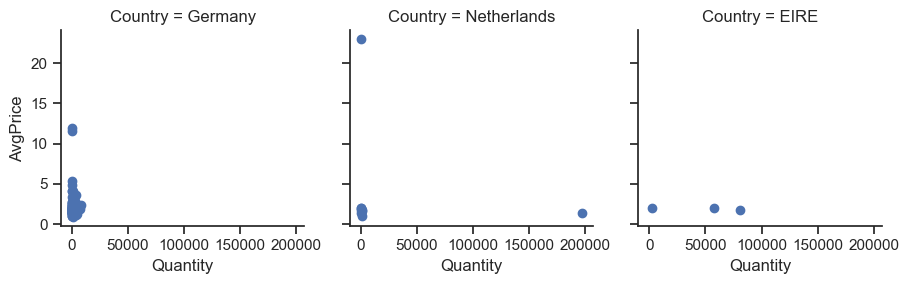

In [66]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

**Langkah 7.4 Apa yang harus dilakukan sekarang?**

Kami tidak jauh lebih baik dari apa yang kami mulai. Data masih sangat tersebar di sekitar dan tampaknya tidak cukup informatif.

Tapi kita tidak boleh putus asa! Ada dua hal yang harus disadari: 1) Data tampaknya condong ke arah sumbu (misalnya, kami tidak memiliki nilai di mana Quantity = 50000 dan AvgPrice = 5). Jadi itu mungkin menunjukkan tren. 2) Kami memiliki lebih banyak data! Kami hanya melihat data dari 3 negara yang berbeda dan mereka diplot pada grafik yang berbeda.

Jadi: kita harus memplot data terlepas dari Negara dan mudah-mudahan melihat grafik yang kurang tersebar.

**Langkah 7.4.1 Plot data untuk setiap CustomerID pada satu grafik**

Kode dibawah ini :

C:\Users\Fransisca Mulya Sari\AppData\Local\Temp\ipykernel_9108\2680025848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

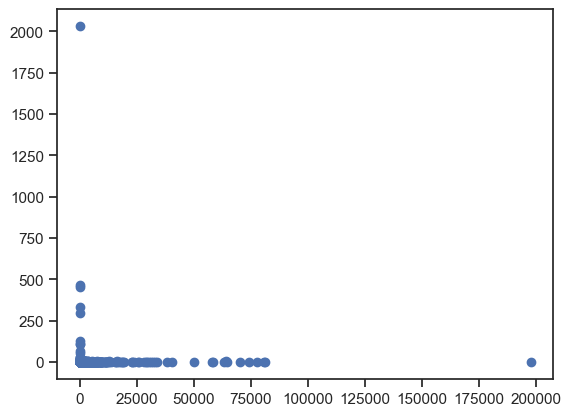

In [67]:
grouped = df_retail.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

**Langkah 7.4.2 Perbesar sehingga kita dapat melihat kurva itu dengan lebih jelas.**

Kode dibawah ini :

In [68]:
grouped = df_retail.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

[]

**Langkah 8. Buat diagram garis yang menunjukkan pendapatan (y) per Harga Satuan (x).**

Apakah Langkah 7 memberi kami wawasan tentang data? Tentu! Ketika harga rata-rata naik, jumlah yang dipesan berkurang. Tapi itu tidak mengejutkan. Akan mengejutkan jika bukan itu masalahnya!

Namun tingkat penurunan kuantitas begitu drastis, itu membuat saya bertanya-tanya bagaimana pendapatan kami berubah sehubungan dengan harga barang. Tidak mengherankan jika itu tidak banyak berubah. Tetapi akan menarik untuk mengetahui apakah sebagian besar pendapatan kita berasal dari barang-barang mahal atau murah, dan seperti apa hubungan itu.

Itulah yang akan kita lakukan sekarang.

**Langkah 8.1 Kelompokkan Harga Satuan dengan interval 1 untuk harga [0,50), dan jumlahkan Kuantitas dan Pendapatan**

Kode dibawah ini :

In [69]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = df_retail.groupby(pd.cut(df_retail.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

**8.3 Plot.**

Kode dibawh ini :

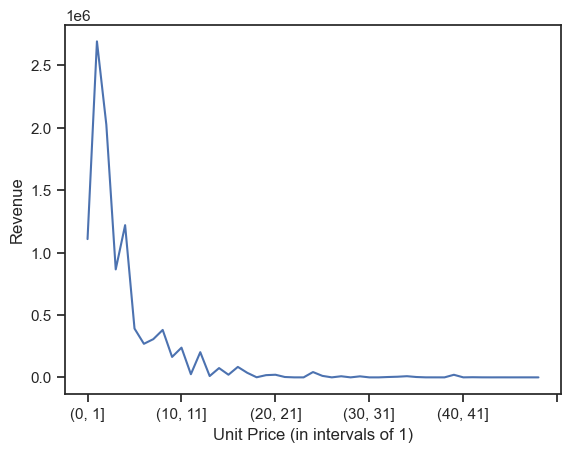

In [70]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

**8.4 Membuatnya terlihat lebih bagus.**

sumbu x membutuhkan nilai. sumbu y tidak mudah dibaca; menunjukkan dalam jutaan.

Kode dibawah ini :

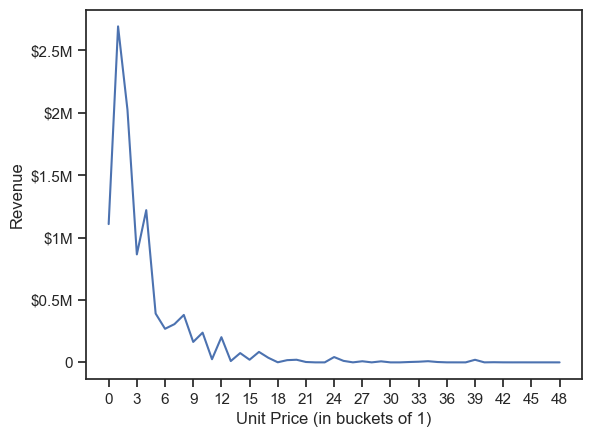

In [71]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

Statistik , Analis Design, Evaluation, and Analysis of Questionnaires for Survey Research https://b-ok.asia/book/2488656/7f3728?dsource=recommend

## Use Case

In [72]:
url = "https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/BusTraficNewYork-2017-06-01.csv"

In [73]:
df=pd.read_csv(url)
df.head()

Unnamed: 0       RecordedAtTime  DirectionRef PublishedLineName  \
0           0  2017-06-01 00:03:34             0                B8   
1           1  2017-06-01 00:03:43             1               S61   
2           2  2017-06-01 00:03:49             0              Bx10   
3           3  2017-06-01 00:03:31             0                Q5   
4           4  2017-06-01 00:03:22             1               Bx1   

                  OriginName  OriginLat  OriginLong  \
0                 4 AV/95 ST  40.616104  -74.031143   
1  ST GEORGE FERRY/S61 & S91  40.643169  -74.073494   
2     E 206 ST/BAINBRIDGE AV  40.875008  -73.880142   
3           TEARDROP/LAYOVER  40.701748  -73.802399   
4      RIVERDALE AV/W 231 ST  40.881187  -73.909340   

                   DestinationName  DestinationLat  DestinationLong  \
0          BROWNSVILLE ROCKAWAY AV       40.656048       -73.907379   
1                S I MALL YUKON AV       40.575935       -74.167686   
2                 RIVERDALE 263 ST       40.912376       -73.902534   
3    ROSEDALE LIRR STA via MERRICK       40.666012       -73.735939   
4  MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   

  VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
0   NYCT_430                 40.635170                 -73.960803   
1  NYCT_8263                 40.590802                 -74.158340   
2  NYCT_4223                 40.886010                 -73.912647   
3  NYCT_8422                 40.668002                 -73.729348   
4  NYCT_4710                 40.868134                 -73.893032   

             NextStopPointName ArrivalProximityText  DistanceFromStop  \
0            FOSTER AV/E 18 ST          approaching              76.0   
1      MERRYMOUNT ST/TRAVIS AV          approaching              62.0   
2  HENRY HUDSON PKY E/W 235 ST              at stop               5.0   
3     HOOK CREEK BL/SUNRISE HY        < 1 stop away             267.0   
4     GRAND CONCOURSE/E 196 ST              at stop              11.0   

   ExpectedArrivalTime ScheduledArrivalTime  
0  2017-06-01 00:03:59             24:06:14  
1  2017-06-01 00:03:56             23:58:02  
2  2017-06-01 00:03:56             24:00:53  
3  2017-06-01 00:04:03             24:03:00  
4  2017-06-01 00:03:56             23:59:38

Pra-pemrosesan dataset Dalam proyek ini, kami akan memvisualisasikan perubahan kondisi lalu lintas jalan di Kota New York akibat bus sepanjang hari. Kita bisa melakukan ini menggunakan peta panas. Peta panas adalah alat yang hebat untuk memvisualisasikan kepadatan kuantitas di suatu area melalui perubahan intensitas warna. Tapi kami ingin memvisualisasikan lalu lintas dari waktu ke waktu.

Apakah Anda tahu bagaimana kita bisa melakukan ini?

Kita dapat melakukan ini dengan menggunakan plugin HeatMapWithTime dari Folium. Ini adalah plugin hebat yang membantu dalam membuat peta panas untuk jangka waktu tertentu. Ini menciptakan animasi peta panas yang dapat kita jeda, putar, putar, dan juga mainkan dengan kecepatan berbeda. Jadi, mari kita pra-proses data kita.

Di sini, kami hanya akan mengambil data untuk satu hari dalam sebulan – 1 Juni 2017. Kami melakukan ini karena kami ingin memvisualisasikan lalu lintas sepanjang hari, bukan sepanjang bulan:

In [74]:
df.duplicated().value_counts()

False    248877
dtype: int64

In [75]:
df.isnull().sum()

Unnamed: 0                       0
RecordedAtTime                   0
DirectionRef                     0
PublishedLineName                0
OriginName                    2778
OriginLat                     2778
OriginLong                    2778
DestinationName                  0
DestinationLat                 390
DestinationLong                390
VehicleRef                       0
VehicleLocation.Latitude         0
VehicleLocation.Longitude        0
NextStopPointName              248
ArrivalProximityText           248
DistanceFromStop               248
ExpectedArrivalTime          29261
ScheduledArrivalTime          6650
dtype: int64

In [76]:
df=df[['RecordedAtTime','VehicleRef','VehicleLocation.Latitude','VehicleLocation.Longitude']]
df.head()

RecordedAtTime VehicleRef  VehicleLocation.Latitude  \
0  2017-06-01 00:03:34   NYCT_430                 40.635170   
1  2017-06-01 00:03:43  NYCT_8263                 40.590802   
2  2017-06-01 00:03:49  NYCT_4223                 40.886010   
3  2017-06-01 00:03:31  NYCT_8422                 40.668002   
4  2017-06-01 00:03:22  NYCT_4710                 40.868134   

   VehicleLocation.Longitude  
0                 -73.960803  
1                 -74.158340  
2                 -73.912647  
3                 -73.729348  
4                 -73.893032

In [77]:
df.isnull().sum()

RecordedAtTime               0
VehicleRef                   0
VehicleLocation.Latitude     0
VehicleLocation.Longitude    0
dtype: int64

In [78]:
# Converting column to datetime
df['RecordedAtTime']=pd.to_datetime(df['RecordedAtTime'],format='%Y-%m-%d %H:%M:%S')
df['RecordedAtTime']

0        2017-06-01 00:03:34
1        2017-06-01 00:03:43
2        2017-06-01 00:03:49
3        2017-06-01 00:03:31
4        2017-06-01 00:03:22
                 ...        
248872   2017-06-01 23:55:09
248873   2017-06-01 23:55:26
248874   2017-06-01 23:55:04
248875   2017-06-01 23:55:25
248876   2017-06-01 23:55:30
Name: RecordedAtTime, Length: 248877, dtype: datetime64[ns]

In [79]:
# Creating hour column
df['hour']=df['RecordedAtTime'].apply(lambda x: x.hour+1)
df.head()

RecordedAtTime VehicleRef  VehicleLocation.Latitude  \
0 2017-06-01 00:03:34   NYCT_430                 40.635170   
1 2017-06-01 00:03:43  NYCT_8263                 40.590802   
2 2017-06-01 00:03:49  NYCT_4223                 40.886010   
3 2017-06-01 00:03:31  NYCT_8422                 40.668002   
4 2017-06-01 00:03:22  NYCT_4710                 40.868134   

   VehicleLocation.Longitude  hour  
0                 -73.960803     1  
1                 -74.158340     1  
2                 -73.912647     1  
3                 -73.729348     1  
4                 -73.893032     1

Ada masalah di sini – tidak semua bus memiliki lokasi yang tercatat pada titik waktu yang sama. Kita dapat mengatasi masalah ini dengan mengambil posisi terakhir yang tercatat dari setiap bus dalam satu jam. Untuk ini, pertama-tama kita dapat menemukan lokasi terakhir yang mencatat waktu bus dalam satu jam, dan kemudian kita dapat menemukan garis lintang dan garis bujur untuk cap waktu ini. Jadi, mari cari catatan waktu terakhir untuk setiap bus dalam satu jam:

In [80]:
df2=pd.DataFrame(df.groupby(['hour','VehicleRef'])['RecordedAtTime'].max())
df2.reset_index(inplace=True)
df2.head()

hour VehicleRef      RecordedAtTime
0     1  NYCT_1206 2017-06-01 00:52:59
1     1  NYCT_1208 2017-06-01 00:03:49
2     1  NYCT_1212 2017-06-01 00:53:10
3     1  NYCT_1213 2017-06-01 00:53:18
4     1  NYCT_1218 2017-06-01 00:53:18

--------------------------
Kami memiliki catatan waktu terakhir untuk setiap bus dalam satu jam. Mari temukan lokasi bus untuk stempel waktu ini. Kita dapat melakukan ini dengan menggabungkan df2 dan df bersama-sama pada kolom hour, VehicleRef dan RecordedAtTime.

Merge Data df2 & df

In [81]:
df3=pd.merge(df2,df,left_on=['hour','VehicleRef','RecordedAtTime'],right_on=['hour','VehicleRef','RecordedAtTime'])
df3.head()

hour VehicleRef      RecordedAtTime  VehicleLocation.Latitude  \
0     1  NYCT_1206 2017-06-01 00:52:59                 40.813268   
1     1  NYCT_1208 2017-06-01 00:03:49                 40.895555   
2     1  NYCT_1212 2017-06-01 00:53:10                 40.876857   
3     1  NYCT_1213 2017-06-01 00:53:18                 40.888707   
4     1  NYCT_1218 2017-06-01 00:53:18                 40.862368   

   VehicleLocation.Longitude  
0                 -73.930409  
1                 -73.896672  
2                 -73.902408  
3                 -73.859971  
4                 -73.913939

Hanya ada satu hal lagi yang harus dilakukan sebelum kita beralih ke bagian berikutnya. Plugin HeatMapWithTime mengambil data dalam format tertentu. Dibutuhkan garis lintang dan garis bujur dalam bentuk array bersarang:

In [82]:
lat_long_list = []
for i in range(1,25): # 24 hours 
    temp=[]
    for index, instance in df3[df3['hour'] == i].iterrows():
        temp.append([instance['VehicleLocation.Latitude'],instance['VehicleLocation.Longitude']])
    lat_long_list.append(temp)

# kita mempunya index = 0 s/d 24 yang isinya la,lo pada jam yang sama 

In [83]:
lat_long_list[0:10]

[[[40.813268, -73.930409],
  [40.895555, -73.896672],
  [40.876857, -73.902408],
  [40.888707, -73.859971],
  [40.862368, -73.913939],
  [40.833402, -73.828433],
  [40.855499, -73.830674],
  [40.845104, -73.890507],
  [40.785552, -73.931472],
  [40.821002, -73.891455],
  [40.799053, -73.921451],
  [40.610577, -74.101946],
  [40.585368, -73.939259],
  [40.614179, -74.035016],
  [40.714786, -74.005795],
  [40.595845, -73.996989],
  [40.636627, -74.036568],
  [40.633605, -73.951315],
  [40.711748, -74.010339],
  [40.541312, -74.162348],
  [40.613537, -74.023224],
  [40.759689, -73.979931],
  [40.741152, -73.988644],
  [40.603543, -74.077535],
  [40.549494, -74.13763],
  [40.640671, -74.018717],
  [40.541727, -74.196658],
  [40.716955, -74.003953],
  [40.765882, -73.976726],
  [40.558828, -74.125731],
  [40.544083, -74.144387],
  [40.665481, -73.996562],
  [40.57888, -73.981879],
  [40.57888, -73.981879],
  [40.606661, -74.075753],
  [40.625344, -74.144031],
  [40.633789, -74.136231],
  [4

In [84]:
!pip install folium

In [85]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 2.3 MB/s eta 0:00:00


In [86]:
import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

from branca.element import Figure
from folium.plugins import HeatMapWithTime

# https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMapWithTime

Memvisualisasikan Lalu Lintas Bus melalui Plugin HeatMapWithTime Dalam hal ini, kami akan memvisualisasikan lalu lintas bus di New York City. plugin TimeSliderChoropleth , merencanakan melalui HeatMapWithTime adalah proses tiga langkah:

In [87]:
fig7=Figure(width=850,height=550)
m7=folium.Map(location=[40.712776, -74.005974],zoom_start=10)
fig7.add_child(m7)

Di sini, saya belum menyebutkan tilesetnya, jadi itu adalah OpenStreetMap. Sekarang, mari tambahkan plugin kita ke peta dasar ini:

In [88]:
HeatMapWithTime(lat_long_list,radius=5,auto_play=True,position='topright').add_to(m7)
m7